In [1]:
from PIL import Image
import requests
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import pyocr

In [2]:
def openImg(url):
    pil_img = Image.open(io.BytesIO(requests.get(url).content))
    pil_img = pil_img.convert('RGB')
    np_img = np.array(pil_img)
    return np_img

In [38]:
img = openImg("https://raw.githubusercontent.com/result-database/ocr-api-v3-notebook/main/IMG_8955.png")

# left:0 top:0 right:1/2 bottom:6/7
img = img[0 : img.shape[0] // 7, 0 : img.shape[1] // 2]

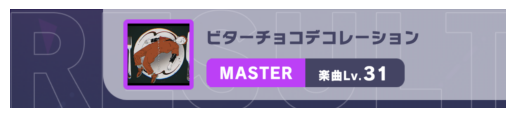

In [39]:
plt.imshow(img)
plt.axis('off')
plt.show()

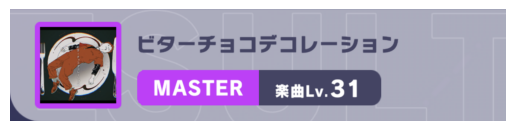

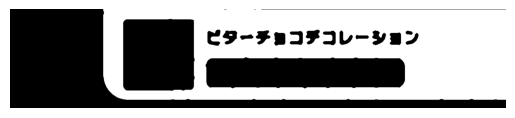

In [40]:
border = 10
img2 = img.copy()

r, g, b = img2[:, :, 0], img2[:, :, 1], img2[:, :, 2]
mask = np.logical_and.reduce((r >= 171 - border, r <= 171 + border, 
                              g >= 172 - border, g <= 172 + border, 
                              b >= 189 - border, b <= 189 + border))
img2[mask] = [255, 255, 255]
img2[np.logical_not(mask)] = [0, 0, 0]

img2 = cv2.medianBlur(img2, 9)

crop_range = Image.fromarray(img2).convert('RGB').getbbox()
img = img[crop_range[1] : (crop_range[3]) // 1, crop_range[0] : crop_range[2]]

plt.imshow(img)
plt.axis('off')
plt.show()

plt.imshow(img2)
plt.axis('off')
plt.show()

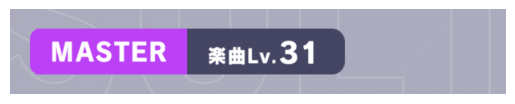

In [67]:
img3 = img.copy()
img4 = img.copy()

r, g, b = img4[:, :, 0], img4[:, :, 1], img4[:, :, 2]
mask = np.logical_and.reduce((r >= 171 - border, r <= 171 + border, 
                              g >= 172 - border, g <= 172 + border, 
                              b >= 189 - border, b <= 189 + border))
img4[mask] = [0, 0, 0]
img4[np.logical_not(mask)] = [255, 255, 255]

img4 = cv2.medianBlur(img4, 9)

crop_range1 = Image.fromarray(img4).convert('RGB').getbbox()
img4 = img4[crop_range1[1] : (crop_range1[3]) // 2, crop_range1[0] : crop_range1[2]]

crop_range2 = Image.fromarray(img4).convert('RGB').getbbox()
vertical_start = crop_range2[1] + (crop_range2[3] - crop_range2[1]) // 3
vertical_end = crop_range2[1] + 2 * (crop_range2[3] - crop_range2[1]) // 3
img4 = img4[vertical_start : vertical_end, crop_range2[0] : crop_range2[2]]

img4 = 255 - img4

crop_range3 = Image.fromarray(img4).convert('RGB').getbbox()
img4 = img4[crop_range3[1] : crop_range3[3], crop_range3[0] : crop_range3[2]]

h, w, _ = img3.shape

img3 = img3[crop_range1[1]+vertical_start+crop_range3[3]+10 : -1, crop_range1[0]+crop_range2[0]+crop_range3[0]-0 : w]

img5 = img3.copy()

plt.imshow(img5)
plt.axis('off')
plt.show()

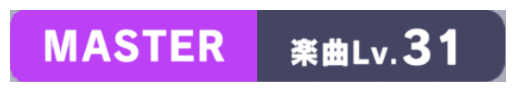

In [70]:
img5 = img3.copy()

border = 20

r, g, b = img5[:, :, 0], img5[:, :, 1], img5[:, :, 2]
mask = np.logical_and.reduce((r >= 171 - border, r <= 171 + border, 
                              g >= 172 - border, g <= 172 + border, 
                              b >= 189 - border, b <= 189 + border))
img5[mask] = [0, 0, 0]
img5[np.logical_not(mask)] = [255, 255, 255]

img5 = cv2.medianBlur(img5, 9)

crop_range1 = Image.fromarray(img5).convert('RGB').getbbox()

plt.imshow(img3.copy()[crop_range1[1] : crop_range1[3], crop_range1[0] : crop_range1[2]])
plt.axis('off')
plt.show()